In [1]:
%load_ext autoreload
import sys
import ipywidgets as widgets

sys.path.append('./code')
from model import load_model_from_name, predict_sentiments, calculate_accuracy, plot_confusion_matrix
from data import preprocess_data

In [7]:
print('Hello there, dear user! Welcome to a demo of several Natural Language Processing models for predicting the sentiment of reviews. These were all trained/fine-tuned on the Stanf')
print('Please select below which model you would like to use:')

model_name = widgets.Dropdown(description='Model:', options=['Conv1D', 'GloVe100D', 'BERT', 'RoBERTa'])
model_name

Hello there, dear user! Welcome to a demo of several Natural Language Processing models for predicting the sentiment of reviews. These were all trained/fine-tuned on the Stanf
Please select below which model you would like to use:


Dropdown(description='Model:', options=('Conv1D', 'GloVe100D', 'BERT', 'Universal Sentence Encoder (USE)', 'GP…

4/4 [==============================] - 1s 28ms/step
GloVe100D Model Accuracy: 42.42%


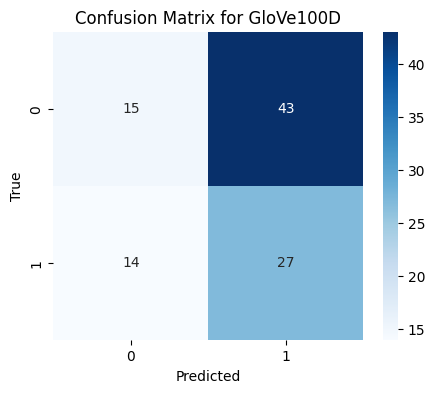

In [8]:
import pandas as pd

X = pd.read_csv("data/test_sample.csv")
X_test, y_test  = X.review, X.sentiment
y_test = y_test.replace('negative', 0).replace('positive', 1).to_numpy() # Transform to numerical values

model = load_model_from_name(model_name.value)
y_test_pred = predict_sentiments(model, preprocess_data(X_test))
accuracy = calculate_accuracy(y_test_pred, y_test)

print(f'{model_name.value} Model Accuracy: {accuracy*100:.2f}%')
plot_confusion_matrix(y_test, y_test_pred, model_name=model_name.value)